In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
X = data.drop(columns=["MEDV"])  # Assuming 'MEDV' is the target column
y = data["MEDV"].values

In [13]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Build the Deep Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),  # Input layer
    
    # First hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu', name='hidden-layer-1'),
    
    # Batch Normalization to stabilize training
    tf.keras.layers.BatchNormalization(name='batch-normalization-1'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2, name='dropout-layer-1'),
    
    # Second hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu', name='hidden-layer-2'),
    
    # Batch Normalization for the second hidden layer
    tf.keras.layers.BatchNormalization(name='batch-normalization-2'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2, name='dropout-layer-2'),

    # Third hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu', name='hidden-layer-3'),
    
    # Batch Normalization to stabilize training
    tf.keras.layers.BatchNormalization(name='batch-normalization-3'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2, name='dropout-layer-3'),
    
    # Output layer with 1 unit (no activation)
    tf.keras.layers.Dense(1, name='output-layer'),
])

In [41]:
# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 642.3143 - val_loss: 524.2499
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 565.2089 - val_loss: 519.0597
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 544.2657 - val_loss: 514.3728
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 513.1142 - val_loss: 509.1020
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 488.4896 - val_loss: 502.6014
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 487.5292 - val_loss: 496.0789
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 465.8060 - val_loss: 486.3481
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 457.1701 - val_loss: 473.5208
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 452.7319 - val_loss: 455.7034
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 426.6212 - val_loss: 436.5533
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 420.2351 - val_loss: 423.7750
Epoch 12/

In [47]:
# Predict the prices using the trained model
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)               │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch-normalization-1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-layer-1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch-normalization-2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-layer-2 (Dropout)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (Dense)               │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch-normalization-3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-layer-3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,053 (226.77 KB)

 Trainable params: 19,137 (74.75 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 38,276 (149.52 KB)

In [51]:
# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 11.097016635832768
Root Mean Squared Error (RMSE): 3.331218491157968
R² Score: 0.848677974084981
Mean Absolute Error (MAE): 2.1386379896425733


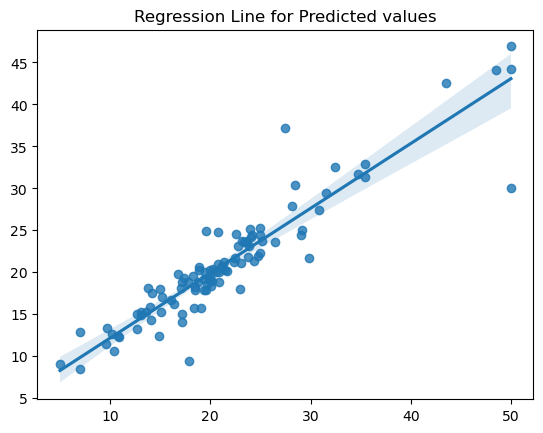

In [53]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

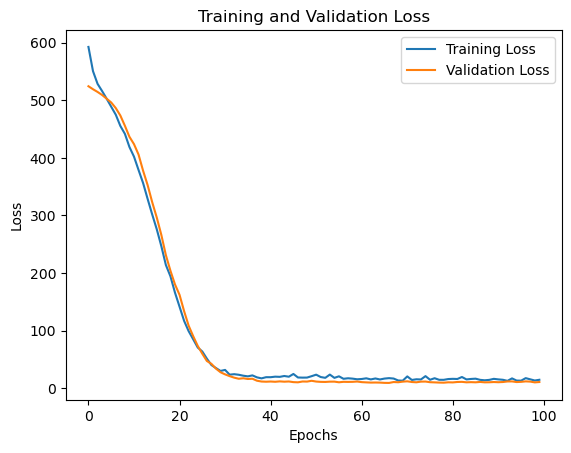

In [55]:
# Plotting training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

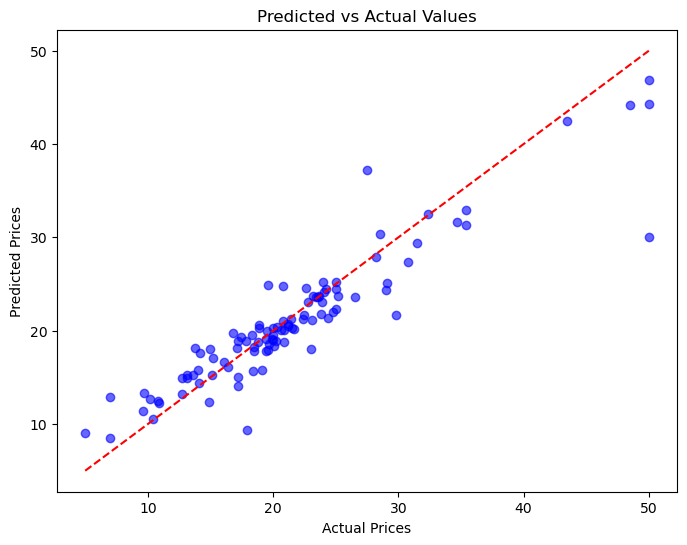

In [57]:

# Plotting predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(13,)))        # Input layer (13 features)
model.add(Dense(1, activation=None)) # Output layer: linear output


In [46]:
# Compile the model with Adam optimizer and MSE loss function
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [48]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 623.1414 - val_loss: 541.6121
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 605.0518 - val_loss: 540.3444
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 618.5159 - val_loss: 539.1012
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 595.2458 - val_loss: 537.9119
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 622.5673 - val_loss: 536.6979
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 589.0023 - val_loss: 535.5057
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 617.2057 - val_loss: 534.3121
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 618.4238 - val_loss: 533.1701
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 562.7395 - val_loss: 531.9992
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 610.4633 - val_loss: 530.8862
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 565.2375 - val_loss: 529.8830
Epoch 12/100
13/13

In [50]:
# Predict the prices using the trained model
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44 (180.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30 (124.00 B)

In [54]:
# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 472.6136178123917
Root Mean Squared Error (RMSE): 21.73967842016969
R² Score: -5.444691620220379
Mean Absolute Error (MAE): 20.719535399184508


In [89]:
#Comparison with traditional approaches
#First let's try with a simple algorithm, the Linear Regression:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)
r2 = r2_score(y_test, y_pred_lr)
print('R2: ',r2)
rmse = np.sqrt(mse_lr) 
print('RMSE: ',rmse)
1

Mean squared error on test data:  24.291119474973513
Mean absolute error on test data:  3.1890919658878474
R2:  0.668759493535632
RMSE:  4.928602182665336


1